In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv(r"C:\Users\merve\Desktop\tavsanliHavaKalitesi.csv")
data.head()

,PM10 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),PM 2.5 ( µg/m3 ),kalite
0,18.98,40.06,14.24,32.99,10.74,1
1,27.72,49.80,14.76,32.97,17.53,0
2,31.96,65.48,14.59,36.73,18.64,0
3,8.09,36.59,15.84,28.18,3.60,1
4,17.33,48.34,14.56,37.10,9.28,0


In [9]:
X = data.drop('kalite', axis=1)
Y = data['kalite']

In [10]:
#eğitim ve test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [16]:
prediction = classifier.predict(X_test)
import numpy as np
correct = np.sum(prediction ==  Y_test)
print ('Test Accuracy: ', correct/float(Y_test.shape[0])*100.0, '%')

Test Accuracy:  90.30303030303031 %


In [14]:
#Performans Ölçütleri
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, prediction)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, prediction)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,prediction)
print("Accuracy:",result2)
print("RMSE:")
print(np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Confusion Matrix:
[[98  4]
 [12 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       102
           1       0.93      0.81      0.86        63

    accuracy                           0.90       165
   macro avg       0.91      0.89      0.89       165
weighted avg       0.90      0.90      0.90       165

Accuracy: 0.9030303030303031
RMSE:
0.3113995776646092


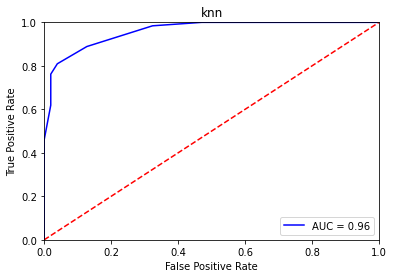

In [15]:
#ROC 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('knn')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()